# Installing Packages

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

# Importing Libraries

In [5]:
import cv2 # pip install opencv-python, 
           # pip install opencv-contrib-python (Full Package)
import os
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # pip install numpy

# Reading and Displaying Image

In [6]:
img_array = cv2.imread("C:/Users/subha/Desktop/PBL - 4_Essentials/mrlEyes_Dataset/Train_Dataset/Closed_Eyes/s0005_00696_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

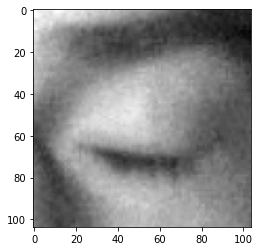

In [7]:
plt.imshow(img_array, cmap="gray") # To plot the Image

In [8]:
img_array.shape # To check the shape of the Image, 86x86 is very small, We have to make it 224x224 (Size used in ImageNet)

(104, 104)

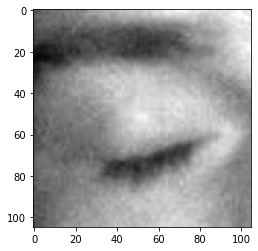

In [9]:
Datadirectory = "C:/Users/subha/Desktop/PBL - 4_Essentials/mrlEyes_Dataset/Train_Dataset"  # Training Dataset
Classes = ["Closed_Eyes", "Open_Eyes"] # List of Classes

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break          #Used to display only first image
    break 

# Resizing

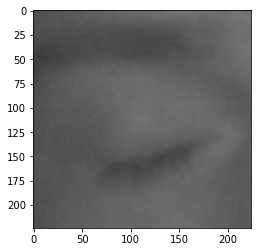

In [10]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Reading all the images and converting them into an array for data and labels

In [11]:
# We're reading all images in the gray format because it was already gray. 
# RGB- Three Channels Red-Green-Blue, GrayScale- Single Channel


training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        
           

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

1924


# Random shuffling to avoid overfitting

In [14]:
import random 
random.shuffle(training_Data)

In [15]:
# Appending data into these Lists.

X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) 
# Here 3 denotes, we've converted our images into RGB because ImageNet consists of RGB Images.

In [16]:
X.shape # 4000 images, 224x224 size, RGB-3

(1924, 224, 224, 3)

# Normalize the Data

In [17]:
X = X/255.0; # we're normalizing it

In [18]:
Y = np.array(y) # Converting Labels into Numpy Array

# Saving our Data

In [19]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Now the file is stored, we can load it whenever we want!

In [20]:
# pickle_in = open("X.pickle", "rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle", "rb")
# y = pickle.load(pickle_in)


# Deep Learning Model for Training & Learning

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = tf.keras.applications.mobilenet.MobileNet() # MobileNet is accurate as well as Lightweight.

In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [23]:
base_input = model.layers[0].input # Input

In [24]:
base_output = model.layers[-4].output # Output of the dropout layer by ignoring last three layers.

In [25]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # One Node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

#Since it's a binary classification, we're using sigmoid activation function.

In [26]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [27]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Setting for Binary Classification (open/closed)

In [28]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
# new_model.fit(X,Y, epochs = 2, validation_split = 0.1) # Training

Epoch 1/2
55/55 [==============================] - 321s 6s/step - loss: 0.0582 - accuracy: 0.9854 - val_loss: 4.2083 - val_accuracy: 0.5130
Epoch 2/2
55/55 [==============================] - 291s 5s/step - loss: 1.7979e-05 - accuracy: 1.0000 - val_loss: 0.8786 - val_accuracy: 0.6010


Epoch 1/10
55/55 [==============================] - 311s 6s/step - loss: 0.0974 - accuracy: 0.9565 - val_loss: 10.4415 - val_accuracy: 0.4819
Epoch 2/10
55/55 [==============================] - 316s 6s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.9299 - val_accuracy: 0.6943
Epoch 3/10
55/55 [==============================] - 334s 6s/step - loss: 1.2485e-05 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9896
Epoch 4/10
55/55 [==============================] - 310s 6s/step - loss: 3.7084e-05 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - 316s 6s/step - loss: 0.0034 - accuracy: 0.9986 - val_loss: 6.3005 - val_accuracy: 0.5130
Epoch 6/10
55/55 [==============================] - 328s 6s/step - loss: 0.0073 - accuracy: 0.9967 - val_loss: 0.1031 - val_accuracy: 0.9896
Epoch 7/10
55/55 [==============================] - 309s 6s/step - loss: 1.8661e-04 - accuracy: 1.0000 - val_loss: 3.6913e-08 - val_accuracy: 1.0

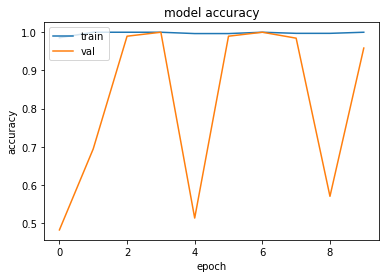

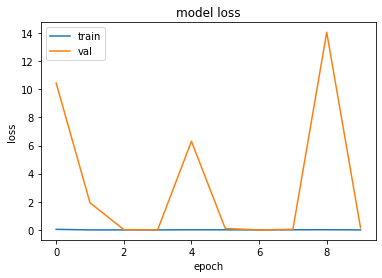

In [29]:
from matplotlib import pyplot as plt
history = new_model.fit(X,Y,validation_split = 0.1, epochs=10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Note:
### The model is showing irrelevant behavior due to system incompetency. The program requires GPU support for optimizing overfit!

In [30]:
new_model.save('my_model.h5') # Saving my Model

In [31]:
new_model = tf.keras.models.load_model('my_model.h5')

# Checking the Network for Predictions

In [32]:
img_array = cv2.imread("C:/Users/subha/Desktop/PBL - 4_Essentials/mrlEyes_Dataset/Train_Dataset/Closed_Eyes/s0006_00002_0_1_0_1_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [33]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [34]:
X_input.shape # 1 image, 224x224, RGB

(1, 224, 224, 3)

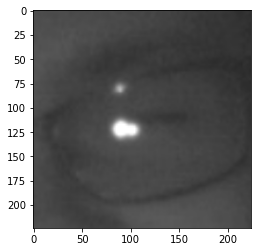

In [35]:
plt.imshow(new_array)

In [36]:
X_input = X_input/255.0

In [37]:
prediction = new_model.predict(X_input)

# For Open Eyes, values tends towards 1 and for Closed Eyes, values tends towards 0

In [38]:
prediction

array([[8.982715e-09]], dtype=float32)

# Let's check on Unknown Images

In [39]:
img = cv2.imread('C:/Users/subha/Desktop/PBL - 4_Essentials/Open Eyes Women.jpg')

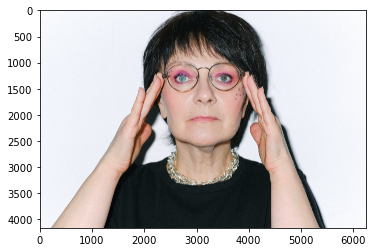

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Detecting Face and Eyes using Haarcascades

In [41]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [42]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [44]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [45]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

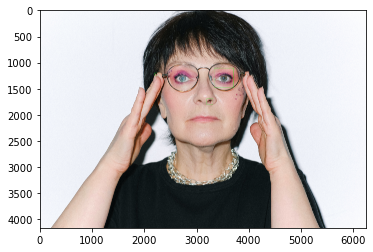

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping Eye Image

In [47]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w] # Region of Interest = ROI
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
#     if len(eyess) == 0:
#         print("Eyes not detected")
#     else:
    for ex, ey, ew, eh in eyess:
        eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

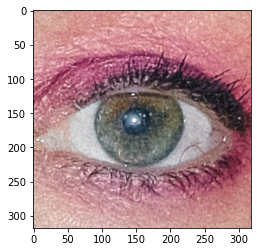

In [48]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [49]:
eyes_roi.shape

(318, 318, 3)

In [50]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
final_image = final_image/255.0

In [51]:
final_image.shape

(1, 224, 224, 3)

In [52]:
new_model.predict(final_image)

array([[0.99999976]], dtype=float32)

# Realtime Video Demo

In [53]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [54]:
from deepface import DeepFace

In [55]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) # Capture through Webcam

#Check if webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
    final_image = final_image/255.0
    
    
    
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw rectangle around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for
    #Inserting text on video
    
    cv2.putText(frame, 
                status, 
                (50, 50), 
                font, 3, 
                (0, 0, 255), 
                2, 
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    
    
    

False
False
Eyes are not detected
False
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
Eyes are not detected
Eyes are not detected
False
False
False
Eyes are not detected
False
Eyes are not detected
False
Eyes are not detected
Eyes are

KeyboardInterrupt: 

# If eyes are closed for unusual time, Alarm is generated!

In [ ]:
import winsound
frequency = 2500 # Set frequency to 2500 Hertz
duration = 100 # Set Duration to 1000 ms == 1 sec
import numpy as np
import cv2
path = "haarcascade_frontalface_alt.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)

#Check if webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
counter = 0    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw rectangle around faces
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
        
    # Use putText() method for inserting text on video
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0,255,0),
                   2,
                   cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #Add Text
        cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0,0,255),
                   2,
                   cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            
        #Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add Text
            cv2.putText(frame, 'Sleep Alert !!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
  
    cv2.imshow('Driverness Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

# Thank you!